<a href="https://colab.research.google.com/github/geo-tp/Keras-Colaboratory-Models/blob/main/rock_paper_scissors_convnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rock Paper Scissors Convnets


## Import

In [1]:
from sys import path
from keras import layers, models, optimizers, preprocessing
import matplotlib.pyplot as plt

## Dataset

In [2]:
# Dataset - hand images with rock, paper or scissors form
# 1772 for training set, 424 for test set

base_dir = path[0] + "/drive/MyDrive/rock-paper-scissors-dataset/"
train_dir = base_dir + "/train/"
test_dir = base_dir + "/test/"
batch_size = 64

train_gen = preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.1,
    rotation_range=20,
    vertical_flip=True,
    validation_split=0.2,
)

val_gen = preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
)

test_gen = preprocessing.image.ImageDataGenerator(
    rescale=1./255,
)

train_datagen = train_gen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    color_mode='grayscale',
    shuffle=True,
    class_mode="categorical",
    seed=111,
    subset="training",
    batch_size=batch_size
)

val_datagen = val_gen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    color_mode='grayscale',
    shuffle=False,
    class_mode="categorical",
    seed=111,
    subset="validation",
    batch_size=batch_size
)

test_datagen = test_gen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    color_mode='grayscale',
    shuffle=False,
    class_mode="categorical",
    seed=111,
    batch_size=batch_size
)

Found 1415 images belonging to 3 classes.
Found 353 images belonging to 3 classes.
Found 420 images belonging to 3 classes.


## Model

In [3]:
# MODEL DEFINITION - the model need to predict if an image shows rock, paper, scissors

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 1)))
model.add(layers.Conv2D(32, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(3, activation="softmax"))

model.summary()

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=["acc"],
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 128)         7

In [4]:
epochs = 120
history = model.fit(train_datagen, validation_data=val_datagen, batch_size=batch_size, epochs=epochs)

Epoch 1/120
23/23 [==============================] - 10s 327ms/step - loss: 1.0924 - acc: 0.4106 - val_loss: 1.0835 - val_acc: 0.3456
Epoch 2/120
23/23 [==============================] - 6s 277ms/step - loss: 1.0776 - acc: 0.4926 - val_loss: 1.0628 - val_acc: 0.6431
Epoch 3/120
23/23 [==============================] - 8s 359ms/step - loss: 1.0547 - acc: 0.6233 - val_loss: 1.0275 - val_acc: 0.7592
Epoch 4/120
23/23 [==============================] - 6s 278ms/step - loss: 1.0140 - acc: 0.7145 - val_loss: 0.9666 - val_acc: 0.8470
Epoch 5/120
23/23 [==============================] - 7s 306ms/step - loss: 0.9567 - acc: 0.7442 - val_loss: 0.8963 - val_acc: 0.8754
Epoch 6/120
23/23 [==============================] - 6s 273ms/step - loss: 0.8810 - acc: 0.7894 - val_loss: 0.8049 - val_acc: 0.8357
Epoch 7/120
23/23 [==============================] - 7s 304ms/step - loss: 0.7804 - acc: 0.8021 - val_loss: 0.6974 - val_acc: 0.8669
Epoch 8/120
23/23 [==============================] - 6s 269ms/step -

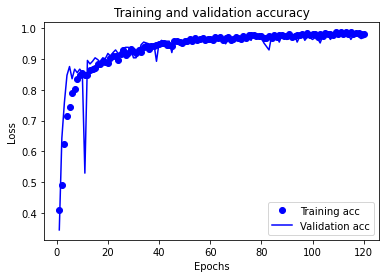

In [5]:
# LOG ACCURACY RESULTS

history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, acc_values, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

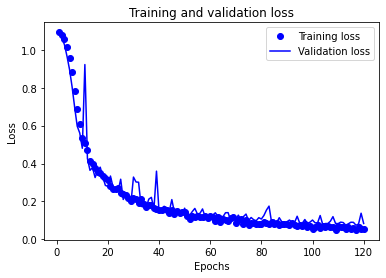

In [6]:
# LOG LOSS RESULTS

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
# EVALUATION

loss, acc = model.evaluate(test_datagen)
print("Accuracy : {}%".format(acc * 100))

7/7 [==============================] - 2s 233ms/step - loss: 0.0622 - acc: 0.9762
Accuracy : 97.6190447807312%
